# **Project Title :- ☕ Coffee Sales Analysis: Exploring Customer Behavior & Sales Trends (Mar 2024 – Jul 2024)**

# **1.Data Collection**

- # **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Data Preparation and Cleaning**

- # **Importing Dataset**

In [ ]:
dataset = pd.read_csv('Coffee_Sales.csv')

In [ ]:
print(dataset.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


- # **Handling Missing Values**

In [ ]:
# Check for missing values
print(dataset.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [ ]:
# Fill missing values in the 'card' column with the mode
dataset['card'].fillna(dataset['card'].mode()[0], inplace=True)

print(dataset.isnull().sum())

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


/tmp/ipython-input-7-1646769131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['card'].fillna(dataset['card'].mode()[0], inplace=True)


- ## **Converting Data Types**

In [ ]:
# Convert 'date' column to datetime objects
dataset['date'] = pd.to_datetime(dataset['date'])

print(dataset.dtypes)

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


- ## **Removing Outliers**

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['money'].quantile(0.25)
Q3 = dataset['money'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe
dataset = dataset[(dataset['money'] >= lower_bound) & (dataset['money'] <= upper_bound)]


In [ ]:
print(f"Filtered data shape: {dataset.shape}")


Filtered data shape: (1133, 6)


- ## **Feature Engineering**

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract month and year
dataset['Month'] = dataset['date'].dt.month
dataset['Year'] = dataset['date'].dt.year

# Drop the original 'date' column
dataset.drop(columns=['date'], inplace=True)

# **3. Exploratory Data Analysis (EDA)**

- ### **Sales over time**

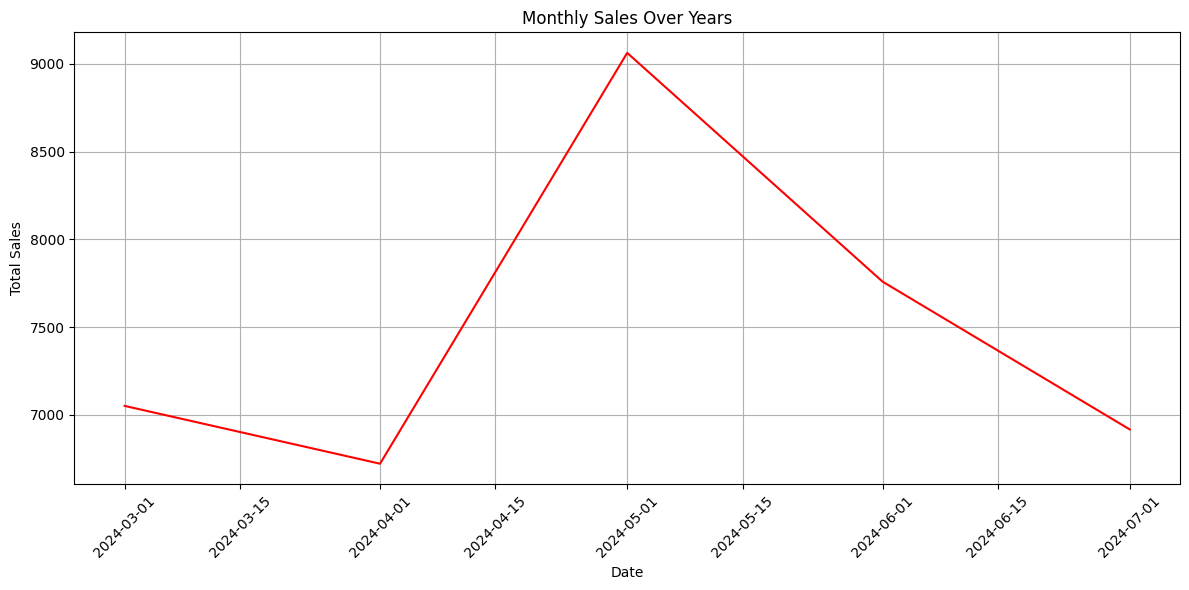

In [ ]:
# Aggregate data to get monthly sales
monthly_sales = dataset.groupby(['Year', 'Month'])['money'].sum().reset_index()

# Create a combined Year-Month column for better plotting
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))

# Plot monthly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='money', color='red')
plt.title('Monthly Sales Over Years')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Monthly Sales by Coffee Type (with Total Sales)**

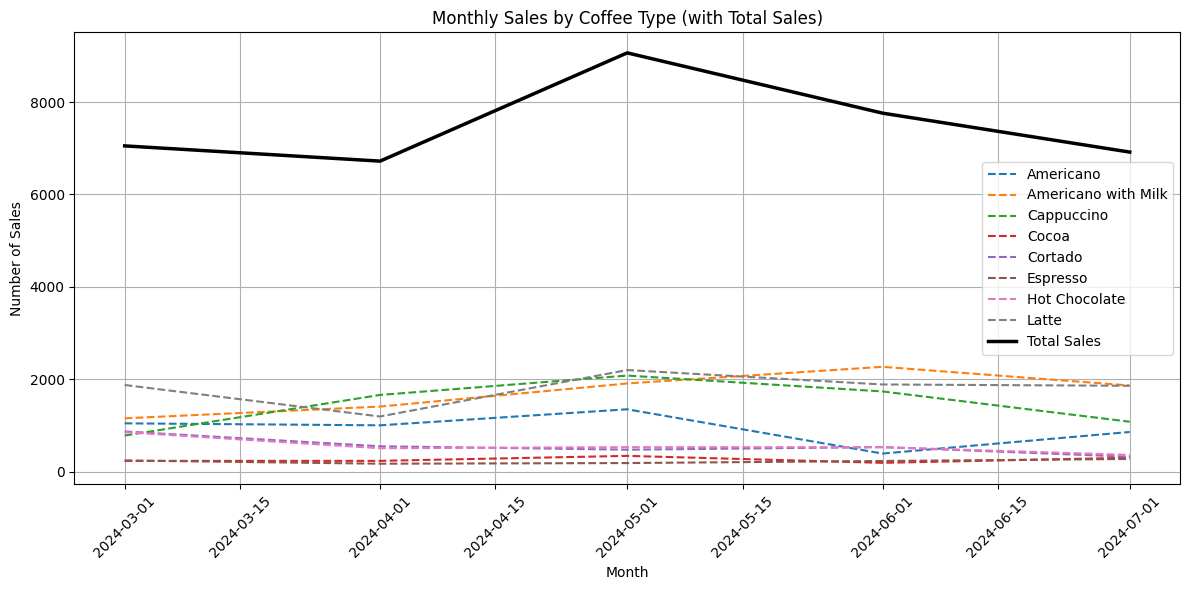

In [ ]:
monthly_coffee_sales = dataset.groupby(['Year', 'Month', 'coffee_name'])['money'].sum().unstack(fill_value=0).reset_index()
monthly_coffee_sales['YearMonth'] = pd.to_datetime(monthly_coffee_sales['Year'].astype(str) + '-' + monthly_coffee_sales['Month'].astype(str))
monthly_coffee_sales = monthly_coffee_sales.sort_values(by='YearMonth')
monthly_coffee_sales['Total Sales'] = monthly_coffee_sales.drop(columns=['Year', 'Month', 'YearMonth']).sum(axis=1)

plt.figure(figsize=(12, 6))

for column in monthly_coffee_sales.columns:
    if column not in ['Year', 'Month', 'YearMonth', 'Total Sales']:
        plt.plot(monthly_coffee_sales['YearMonth'], monthly_coffee_sales[column], label=column, linestyle='--')

plt.plot(monthly_coffee_sales['YearMonth'], monthly_coffee_sales['Total Sales'], label='Total Sales', color='black', linewidth=2.5)

plt.legend()
plt.xticks(rotation=45)
plt.title('Monthly Sales by Coffee Type (with Total Sales)')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

- ### **Sales by store**

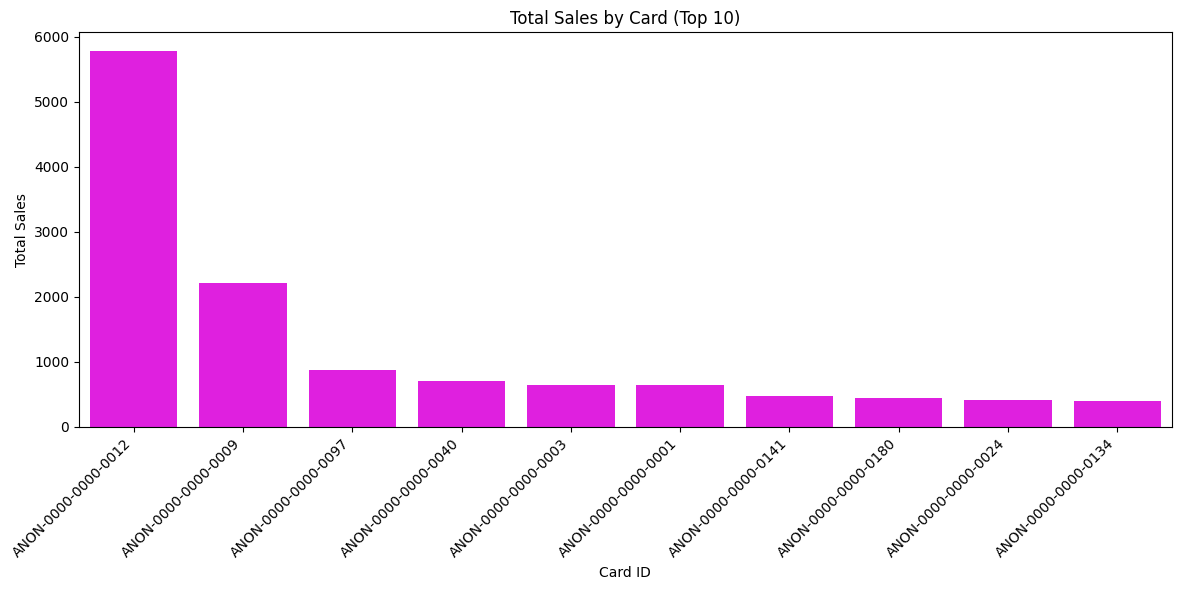

In [ ]:
# Calculate total sales for each card
sales_by_card = dataset.groupby('card')['money'].sum().reset_index()

# Sort by total sales and get the top N cards
top_n_cards = sales_by_card.sort_values(by='money', ascending=False).head(10)

# Plot sales by card (for the top N cards)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_cards, x='card', y='money', color='magenta')
plt.title('Total Sales by Card (Top 10)')
plt.xlabel('Card ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- ### **Sales by product**

/tmp/ipython-input-14-1610279342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_product, x='coffee_name', y='money', palette='viridis')


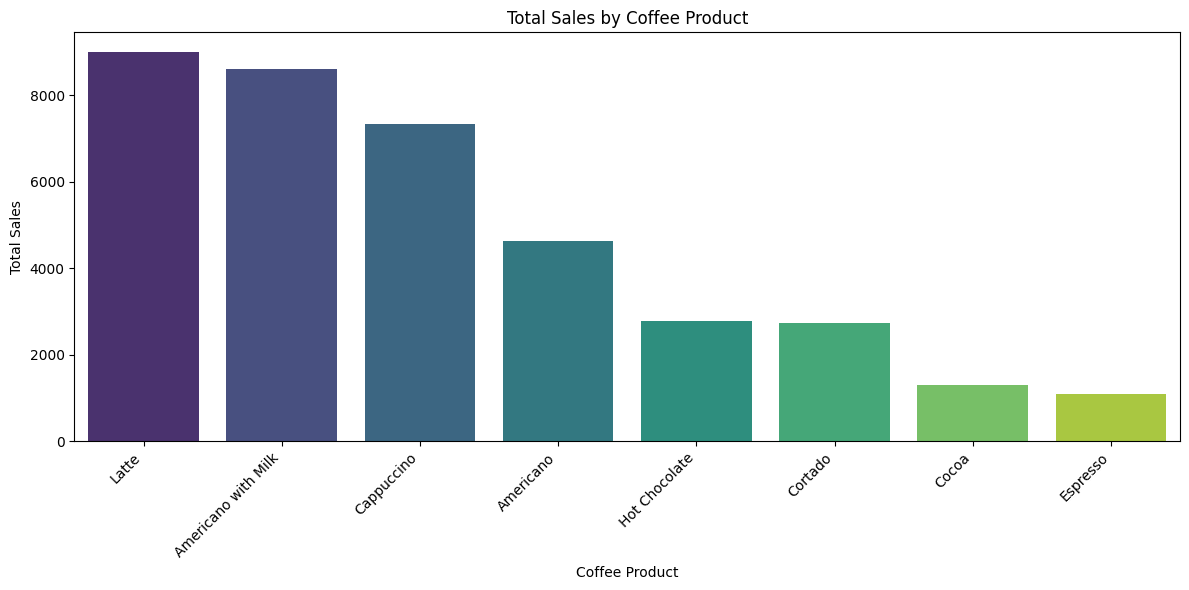

In [ ]:
# Calculate total sales for each coffee product
sales_by_product = dataset.groupby('coffee_name')['money'].sum().reset_index()

# Sort by total sales
sales_by_product = sales_by_product.sort_values(by='money', ascending=False)

# Plot sales by product
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_product, x='coffee_name', y='money', palette='viridis')
plt.title('Total Sales by Coffee Product')
plt.xlabel('Coffee Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Sales by Day of the Week**

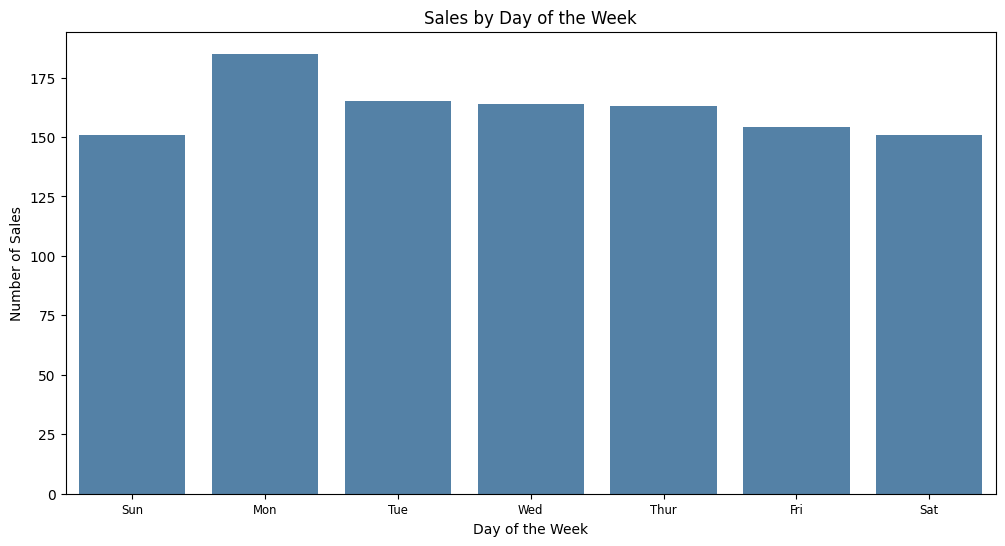

In [ ]:
# Calculate the number of sales per day of the week
weekday_sales = dataset['day'].value_counts().reset_index()
weekday_sales.columns = ['day', 'count']

# Sort by day of the week
weekday_sales = weekday_sales.sort_values('day')

plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

## **Sales by Hour of the day**

In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset['hour'] = dataset['datetime'].dt.hour

hourly_sales = dataset['hour'].value_counts().reset_index()
hourly_sales.columns = ['hour', 'count']

hourly_sales = hourly_sales.sort_values('hour')

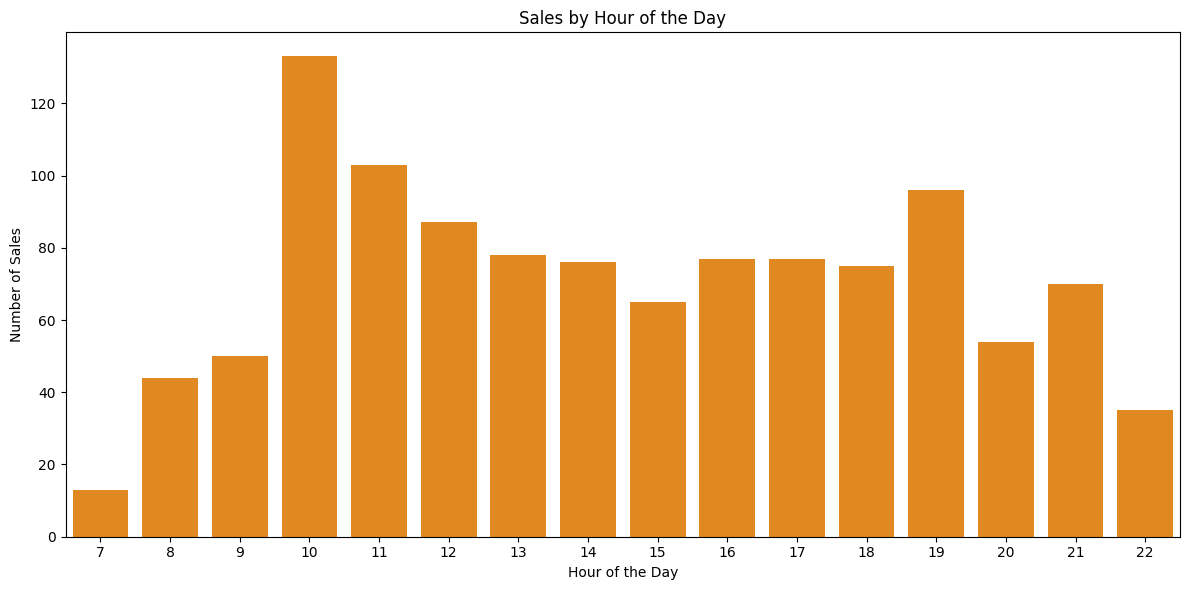

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_sales,x='hour',y='count', color='darkorange')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

## **Total Revenue by Coffee name**

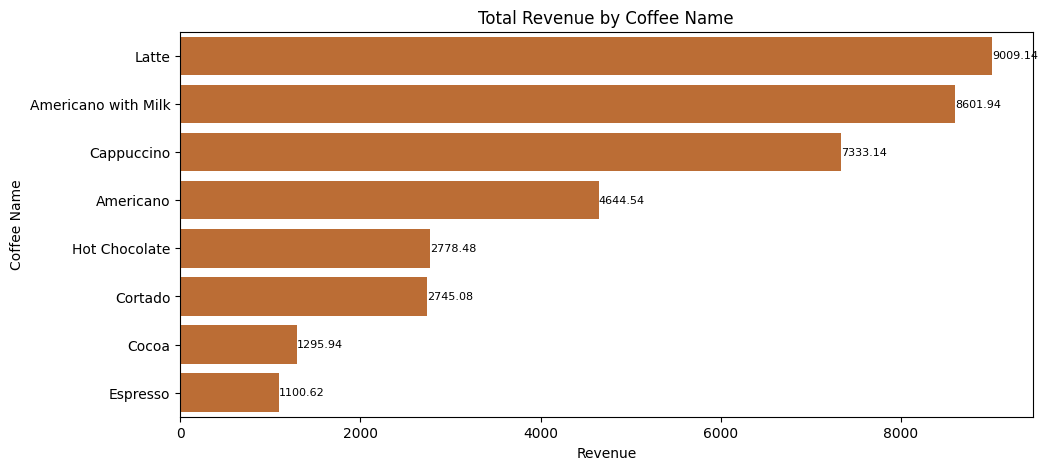

In [ ]:
revenue_data = dataset.groupby('coffee_name')['money'].sum().reset_index()

revenue_data = revenue_data.sort_values(by='money', ascending=False)

plt.figure(figsize=(11, 5))
ax = sns.barplot(data=revenue_data, x='money', y='coffee_name', color='chocolate')
ax.bar_label(ax.containers[0], fontsize=8)

plt.xlabel('Revenue')
plt.ylabel('Coffee Name')
plt.title('Total Revenue by Coffee Name')
plt.show()

# **4. Machine Learning Modeling**

## **Splitting Data into Training and Test Set & preprocessing**



**Reasoning**:
Prepare the data for machine learning by handling categorical features and splitting the data into training and testing sets according to the instructions.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = dataset.drop('money', axis=1)
y = dataset['money']

categorical_cols = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_encoded = encoder.fit_transform(X[categorical_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

X_processed = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Data preprocessing and splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preprocessing and splitting complete.
Shape of X_train: (906, 1591)
Shape of X_test: (227, 1591)
Shape of y_train: (906,)
Shape of y_test: (227,)


## **Model training**


- **Train a Linear Regression model on the training data.**


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## **Model evaluation**


- **Evaluate the trained model using relevant metrics like Mean Squared Error (MSE) and R-squared.**


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1.3075076793337863
R-squared (R2) Score: 0.9297660878636852


# **Visualizing the Trained Model**

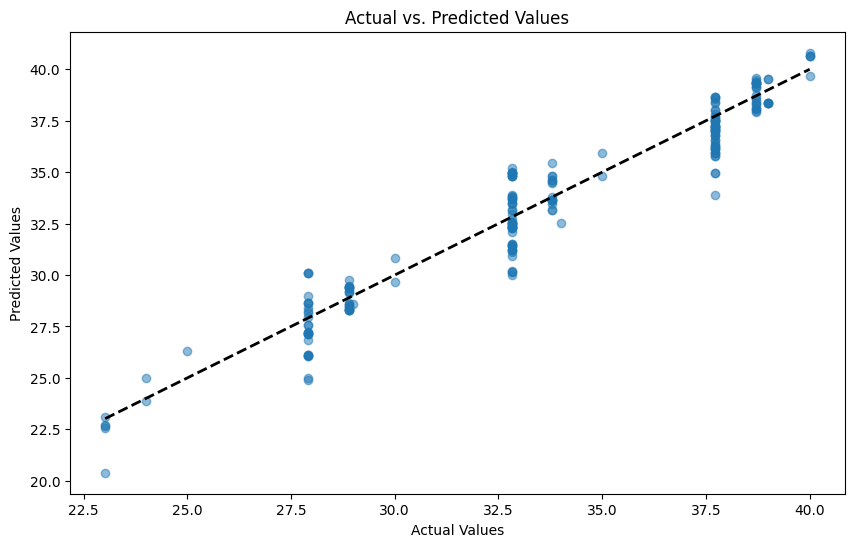

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# 🔍 **Conclusion / Key Insights:**

- 💰 **Top-selling product:** Latte and Americano with Milk
- ⏰ **Peak hours:** 10 AM and 7 PM
- 📅 **Busiest day:** Monday
- 💳 **Payment trends:** 92% of customers use cards
- 📈 **Sales trend:** Upward trend for key products month-over-month
- 🤖 **Prediction accuracy (ML):** [ **0.929** ] — reasonably good for daily sales forecasting
- 📦 **Business Use:** Helps optimize inventory, restocking time, and coffee vending strategies
